In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def sigmoid(x): #FUNÇÃO PARA CALCULAR O SIGMOIDE
    return 1/(1+np.exp(-x))

In [2]:
DataSet = pd.read_csv('DataCEI.csv') #carregando o arquivo com os dados

In [3]:
DataSet.head() #imprime as primeiras linhas

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,11:34:06,48,64,72,66,39,1,0
1,11:34:07,48,64,44,57,66,1,0
2,11:34:10,48,64,58,56,46,1,0
3,11:34:12,48,64,59,61,47,1,0
4,11:34:15,48,64,95,130,163,1,0


In [4]:
DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)

In [5]:
DataSet.head()

,NumAmostra,Area,Delta,Output1,Output2
0,72,66,39,1,0
1,44,57,66,1,0
2,58,56,46,1,0
3,59,61,47,1,0
4,95,130,163,1,0


In [6]:
DataSet.columns #mostra as colunas da tabela

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

In [7]:
X = DataSet.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(DataSet.drop(['Output1', 'Output2'],axis=1), 
                                                    DataSet[['Output1', 'Output2']], test_size=0.30, 
                                                    random_state=101)
print(y_test)
print(X_test)

    Output1  Output2
16        0        1
10        1        0
22        0        1
19        0        1
7         1        0
21        0        1
2         1        0
3         1        0
    NumAmostra  Area  Delta
16          36   144     88
10          62    52     38
22          65    75     51
19          68   178    119
7           60    51     38
21          50    55     54
2           58    56     46
3           59    61     47


## Configuração da MPL

In [10]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3 #NÚMERO DE ENTRADAS
N_hidden = 4 #NÚMERO DE CAMADAS OCULTAS
N_output = 2 #NÚMERO DE SÁIDAS
learnrate = 0.5 #TAXA DE APRENDIZAGEM

In [11]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[ 0.10236134 -0.08306381 -0.10270079  0.16927654]
 [ 0.1907361  -0.04880143  0.05089441 -0.01501564]
 [-0.04612437  0.15820866 -0.03757797  0.0449136 ]]
Pesos da Camada de Saída:
[[ 0.07619621 -0.07454732]
 [ 0.13632154 -0.01153954]
 [-0.02963671 -0.06027406]
 [ 0.0659703  -0.02429616]]


## Inicialização dos pesos da MPL (Aleatório)

## Algoritmo Backpropagation



In [12]:
epochs = 5000 #ÉPOCAS
last_loss = None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs): #FOR QUE PERCORRE TODAS AS ÉPOCAS
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
        #Atualização dos pesos na época em questão
        weights_input_hidden += learnrate * delta_w_i_h / n_records
        weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
        # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.23709213829778963
Erro quadrático no treinamento:  0.2027552749079381
Erro quadrático no treinamento:  0.20275464870481577
Erro quadrático no treinamento:  0.20212311069674732
Erro quadrático no treinamento:  0.202127011460062  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.20212699949830393
Erro quadrático no treinamento:  0.2021269849173164
Erro quadrático no treinamento:  0.20212696675007458
Erro quadrático no treinamento:  0.20212694348640933
Erro quadrático no treinamento:  0.20212691262921612
Erro quadrático no treinamento:  0.2021268697303818
Erro quadrático no treinamento:  0.2021268060217833
Erro quadrático no treinamento:  0.20212670148558864
Erro quadrático no treinamento:  0.20212649827550055
Erro quadrático no treinamento:  0.20212593117871808
Erro quadrático no treinamento:  0.20211555280748472
Erro quadrático no treinamento:  0.20212667641230822  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.2021

### Gráfico da Evolução do Erro

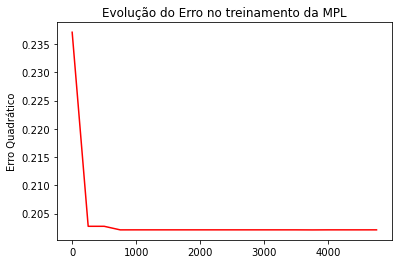

In [13]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()


## Validação do modelo

In [14]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
MSE_Output1=0
MSE_Output2=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        
#-------------------------------------------    
    
#Cálculo do Erro
        ## TODO: Cálculo do Erro
        error = yi - output
        MSE_Output1 += (yi[0] - output[0])**2
        MSE_Output2 += (yi[1] - output[1])**2
          
#Erro Quadrático Médio 
MSE_Output1/=n_records 
MSE_Output2/=n_records  

print('Erro Quadrático Médio da Saída Output1 é: ',MSE_Output1)
print('Erro Quadrático Médio da Saída Output2 é: ',MSE_Output2)

Erro Quadrático Médio da Saída Output1 é:  0.2525416205551984
Erro Quadrático Médio da Saída Output2 é:  0.2525416205537272
